# Student Performance Indicator
### Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 .
The data consists of 8 column and 1000 rows.
## 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import csv file as dataframe

In [4]:
df=pd.read_csv("C:\CodeBasics_DataAnalyst\ML_DL_Projects\MLProject1-files\stud.csv")

### Show top 5 records 

In [7]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset 

In [8]:
df.shape

(1000, 8)

### 2.2 Dataset information
gender : sex of students -> (Male/female),
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E),
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school),
lunch : having lunch before test (standard or free/reduced),
test preparation course : complete or not complete before test,
math score,
reading score,
writing score
### 3. Data Checks to perform
Check Missing values,
Check Duplicates,
Check data type,
Check the number of unique values of each column,
Check statistics of data set,
Check various categories present in the different categorical column
### 3.1 Check Missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###### There is no missing values in a dataset

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

0

###### There is no duplicate values in a dataset

### 3.3 Check datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [23]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
average_score                  194
dtype: int64

#### 3.5 Check statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
1) From above description of numerical data,the mean is in between 66 and 68.05
2) Standard deviation are in between 14.6 and 15.19
3) Min score for math is 0 , for reading is 17 and for writing is 10

#### 3.7 Exploring Data

In [14]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [15]:
categorical_var=['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
for cat in categorical_var:
    print(f"Categories in {cat} variable :", df[cat].unique())

Categories in gender variable : ['female' 'male']
Categories in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test_preparation_course variable : ['none' 'completed']


In [16]:
# Define numerical and categorical variables
numerical_var=[var for var in df.columns if df[var].dtype != 'O']
categorical_var = [var for var in df.columns if df[var].dtype == 'O']

print("We have {0} of numerical variables : {1}".format(len(numerical_var),numerical_var))
print("We have {0} of categorical variables : {1}".format(len(categorical_var),categorical_var))

We have 3 of numerical variables : ['math_score', 'reading_score', 'writing_score']
We have 5 of categorical variables : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns "Total_score" and "average_score"

In [17]:
df["total_score"] = df['math_score']+df["reading_score"]+df["writing_score"]
df["average_score"]=df["total_score"]/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [18]:
math_full = df[df['math_score']==100]['race_ethnicity'].count()
reading_full = df[df['reading_score']==100]['lunch'].count()
writing_full = df[df['writing_score']==100]['gender'].count()


In [19]:
math_lessthan20=df[df['math_score']<=20]['gender'].count()
reading_lessthan20=df[df['reading_score']<=20]['lunch'].count()
writing_lessthan20=df[df['writing_score']<=20]['average_score'].count()


In [20]:
full_marks=[math_full,reading_full,writing_full]
subjects=['math','reading','writing']
for full,sub in zip(full_marks,subjects):
    print(f'{full} number of students get full marks in {sub}')


7 number of students get full marks in math
17 number of students get full marks in reading
14 number of students get full marks in writing


In [21]:
lessthan20_marks=[math_lessthan20,reading_lessthan20,writing_lessthan20]
subjects=['math','reading','writing']
for val,sub in zip(lessthan20_marks,subjects):
    print(f"{val} number of students get lessthan 20 in {sub}")

4 number of students get lessthan 20 in math
1 number of students get lessthan 20 in reading
3 number of students get lessthan 20 in writing


### Insights
1) Less students get full marks in maths subject and high in reading
2) Less students get lessthan 20 marks in reading and high in math

### 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)
### 4.1.1 Histogram & KDE

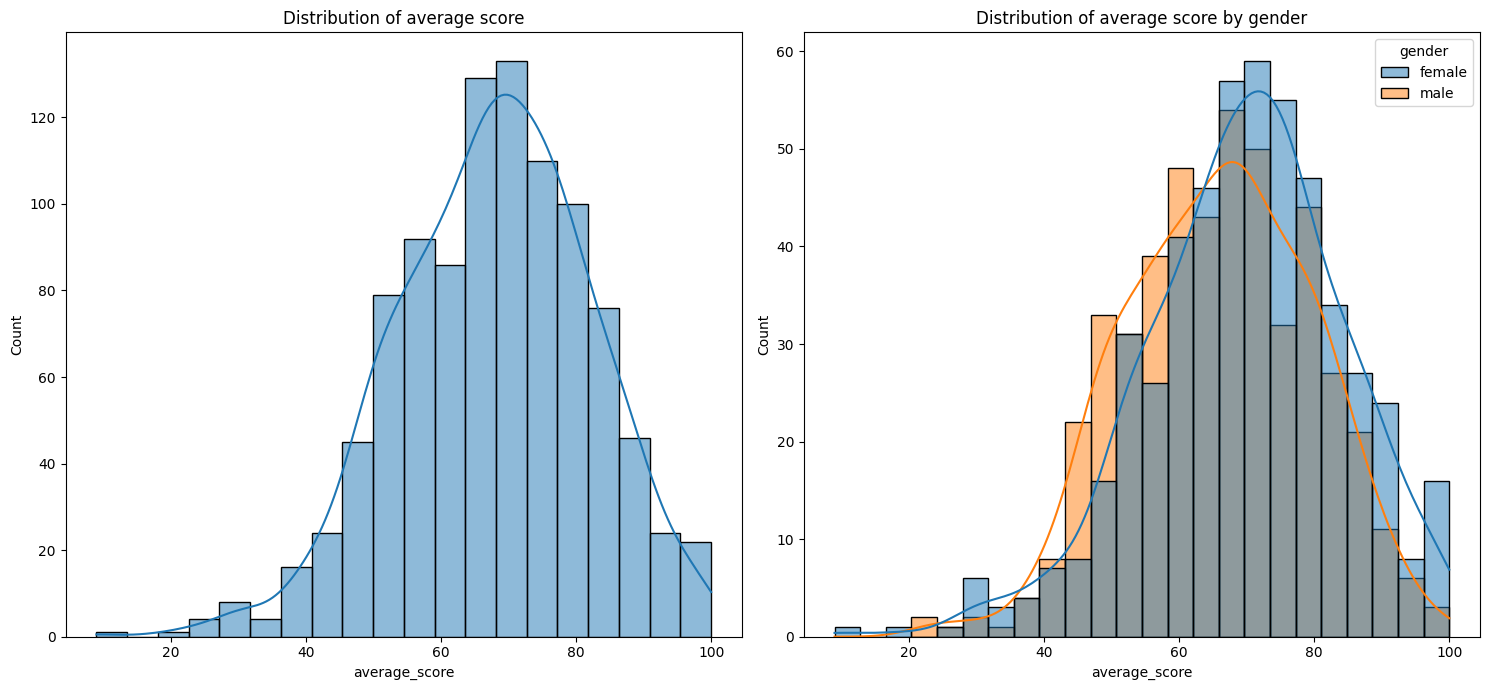

In [51]:
# Creating 1*2 grid of subplots
fig,axs=plt.subplots(1,2,figsize=(15,7))

# First plot:Distribution of average score
sns.histplot(data=df,x='average_score',bins=20,kde=True,ax=axs[0])
axs[0].set_title("Distribution of average score")

# Second plot: Distribution of average score by gender
sns.histplot(data=df,x='average_score',kde=True,hue='gender',ax=axs[1])
axs[1].set_title("Distribution of average score by gender")

# Adjust layout
plt.tight_layout()
plt.show()

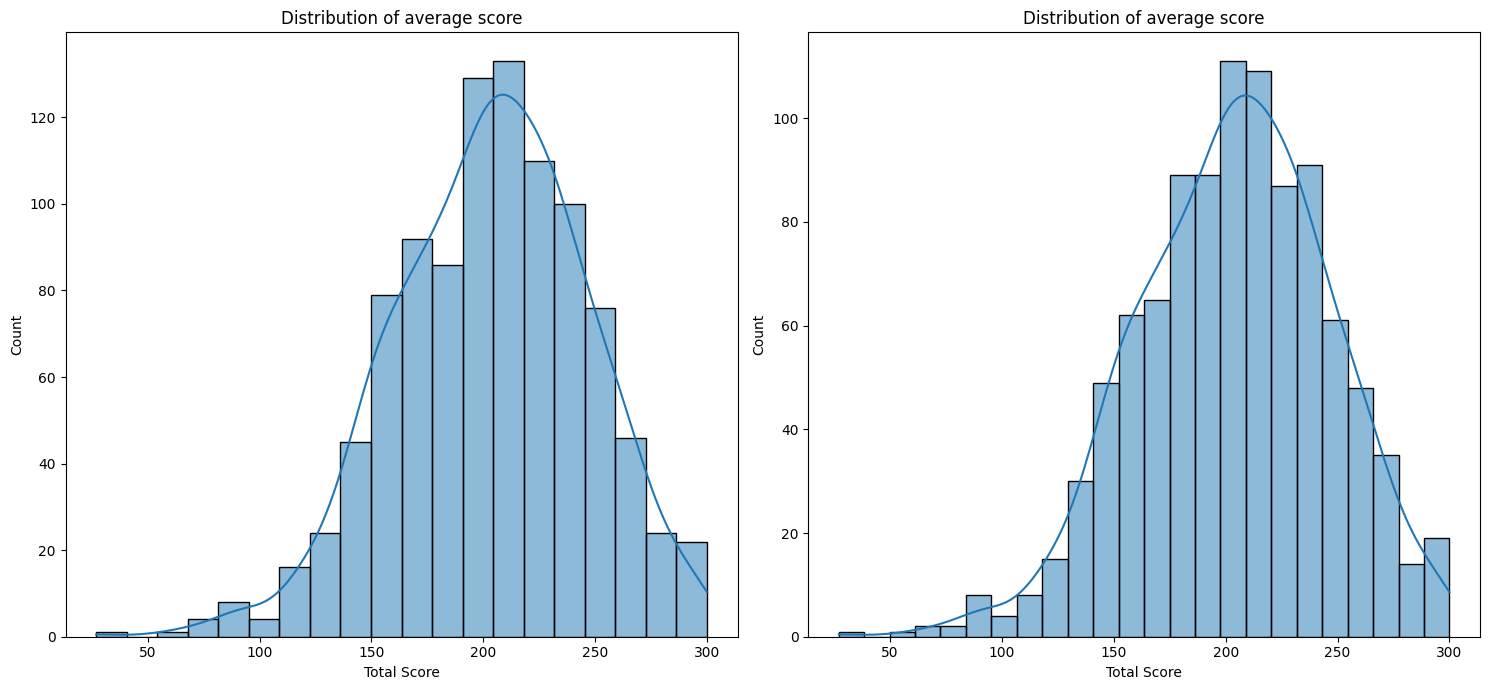

In [68]:
# Create 1*2 grid of subplots
fig,axs=plt.subplots(1,2,figsize=(15,7))

# First Plot: Distribution of average score
sns.histplot(data=df,x='total_score',kde=True,bins=20,ax=axs[0])
axs[0].set_title('Distribution of average score')
axs[0].set_xlabel("Total Score")
axs[0].set_ylabel("Count")

# Second plot : Distribution of average score by gender
sns.histplot(data=df,x='total_score',kde=True,ax=axs[1])
axs[1].set_title('Distribution of average score')
axs[1].set_xlabel("Total Score")
axs[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

### Insights
Female students are performing well than male students

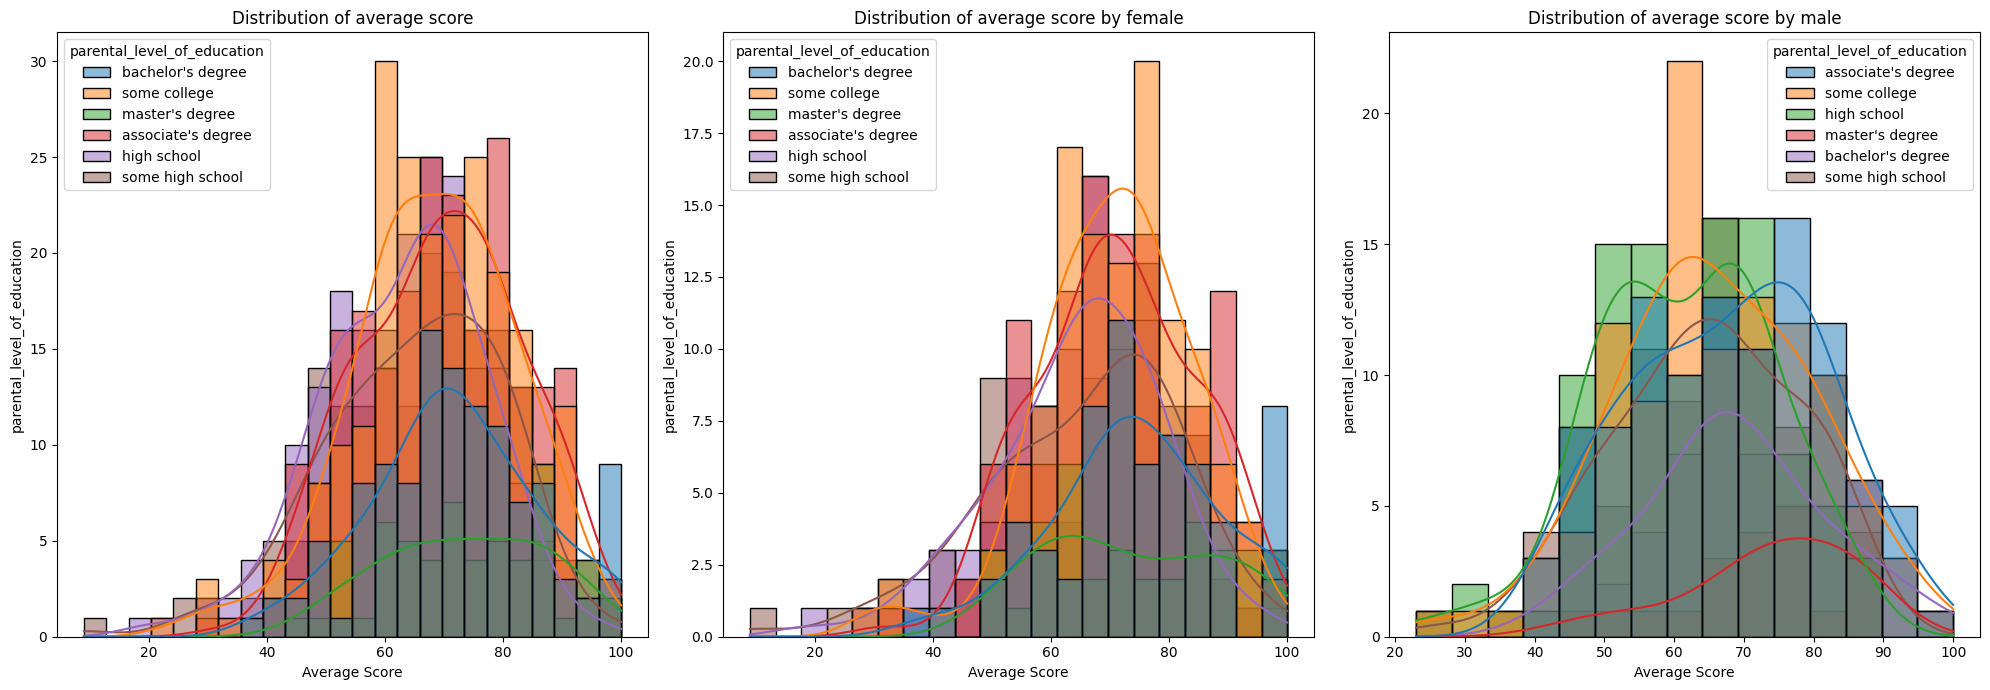

In [100]:
# create 1*3 grid of subplots
fig,axs=plt.subplots(1,3,figsize=(20,7))

# First plot: Distribution of average score
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education',ax=axs[0])
axs[0].set_title("Distribution of average score")
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('parental_level_of_education')

# Second plot : Distribution of average score by female
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education',ax=axs[1])
axs[1].set_title("Distribution of average score by female")
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('parental_level_of_education')

# Third plot : Distribution of average score by male
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='parental_level_of_education',kde=True,ax=axs[2])
axs[2].set_title("Distribution of average score by male")
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('parental_level_of_education')

plt.tight_layout()
plt.show()

### Insights
1) In general parent's education don't help student perform well in exam.
2) 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
3) 3rd plot we can see there is no effect of parent's education on female students.

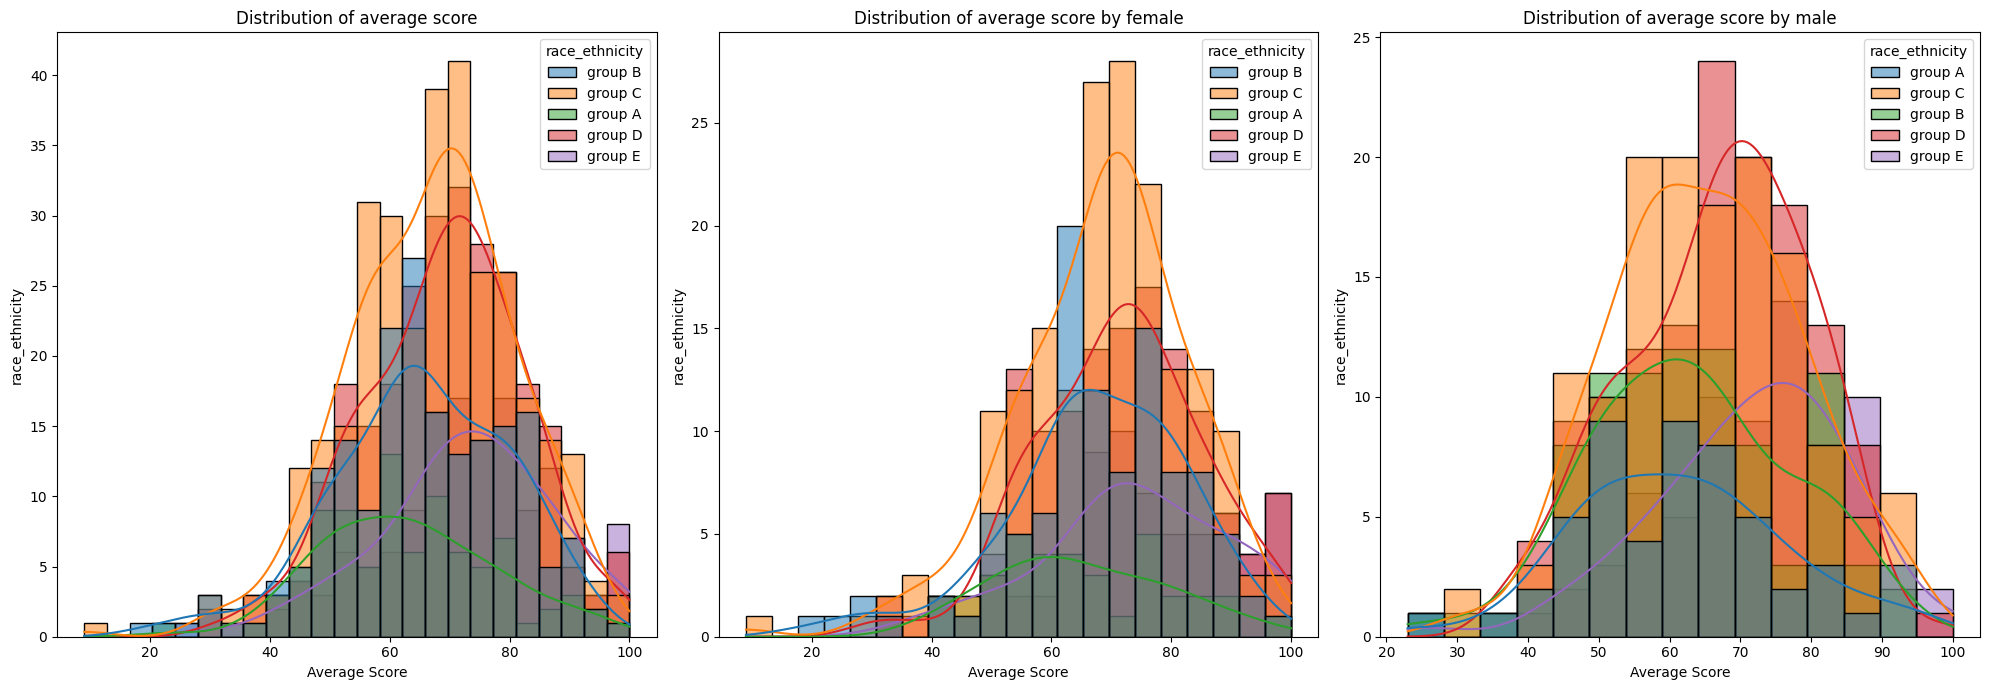

In [108]:
# create 1*3 grid of subplots
fig,axs=plt.subplots(1,3,figsize=(20,7))

# First plot: Distribution of average score
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity',ax=axs[0])
axs[0].set_title("Distribution of average score")
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('race_ethnicity')

# Second plot : Distribution of average score by female
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity',ax=axs[1])
axs[1].set_title("Distribution of average score by female")
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('race_ethnicity')

# Third plot : Distribution of average score by male
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='race_ethnicity',kde=True,ax=axs[2])
axs[2].set_title("Distribution of average score by male")
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('race_ethnicity')

plt.tight_layout()
plt.show()

### Insights
1) Students of group A and group B tends to perform poorly in exam.
1) Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

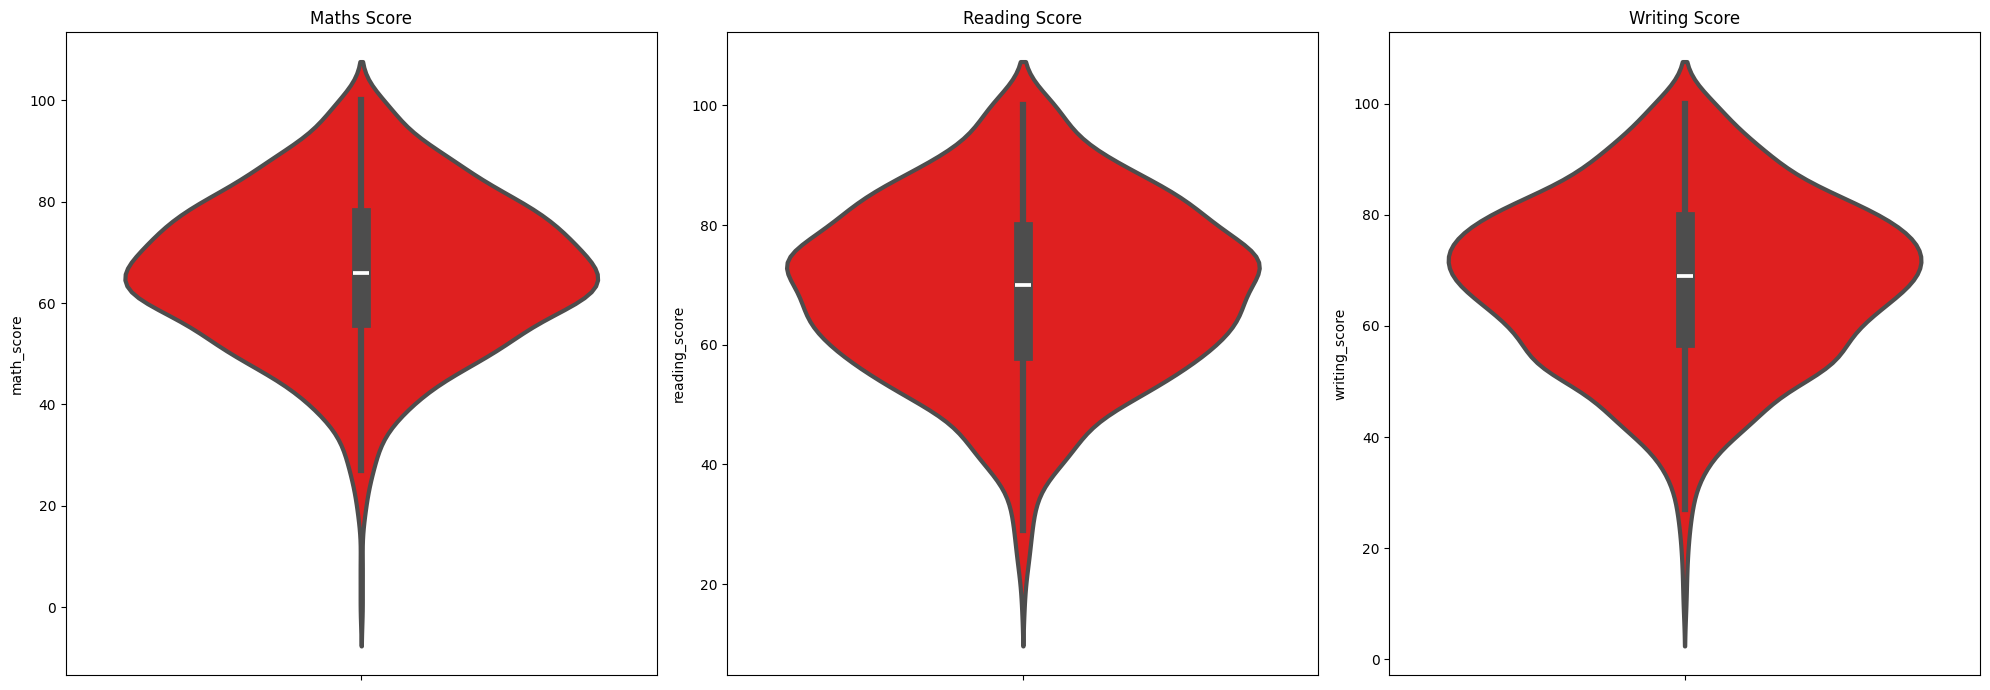

In [121]:
fig,axs=plt.subplots(1,3,figsize=(20,7))
sns.violinplot(data=df,y="math_score",color='red',linewidth=3,ax=axs[0])
axs[0].set_title("Maths Score")
sns.violinplot(data=df,y="reading_score",color='red',linewidth=3,ax=axs[1])
axs[1].set_title("Reading Score")
sns.violinplot(data=df,y="writing_score",color='red',linewidth=3,ax=axs[2])
axs[2].set_title("Writing Score")
plt.tight_layout()
plt.show()

### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

In [151]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [154]:
print(df['parental_level_of_education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


### 4.3 Multivariate analysis using pieplot

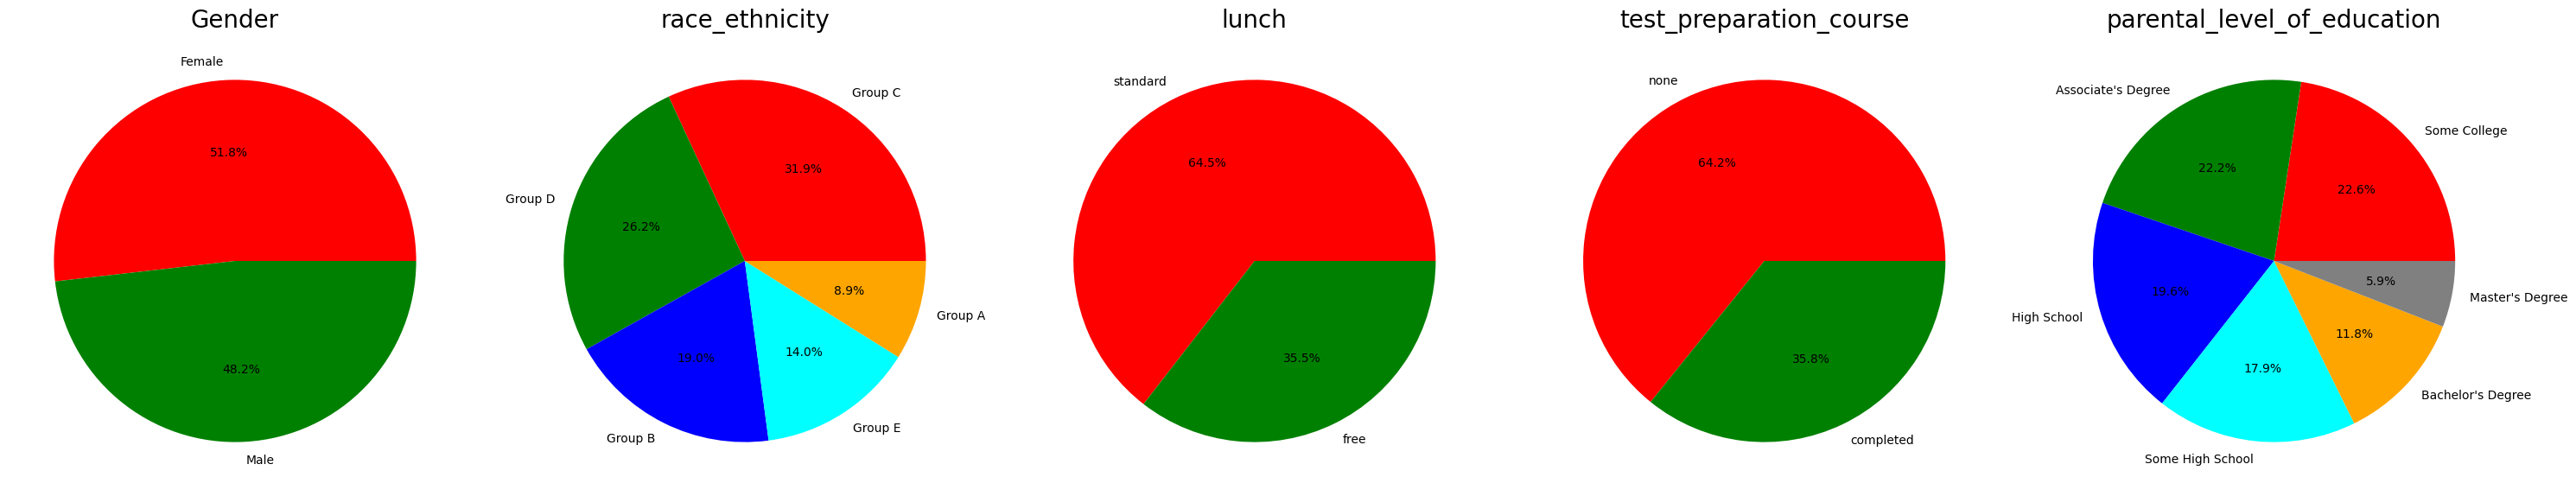

In [157]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct="%1.1f%%")
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct="%1.1f%%")
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'standard', 'free'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct="%1.1f%%")
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['none' , 'completed']
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct="%1.1f%%")
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct="%1.1f%%")
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Insights
1) Number of Male and Female students is almost equal
2) Number students are greatest in Group C
3) Number of students who have standard lunch are greater
4) Number of students who have not enrolled in any test preparation course is greater
5) Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
1) How is distribution of Gender ?
2) Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

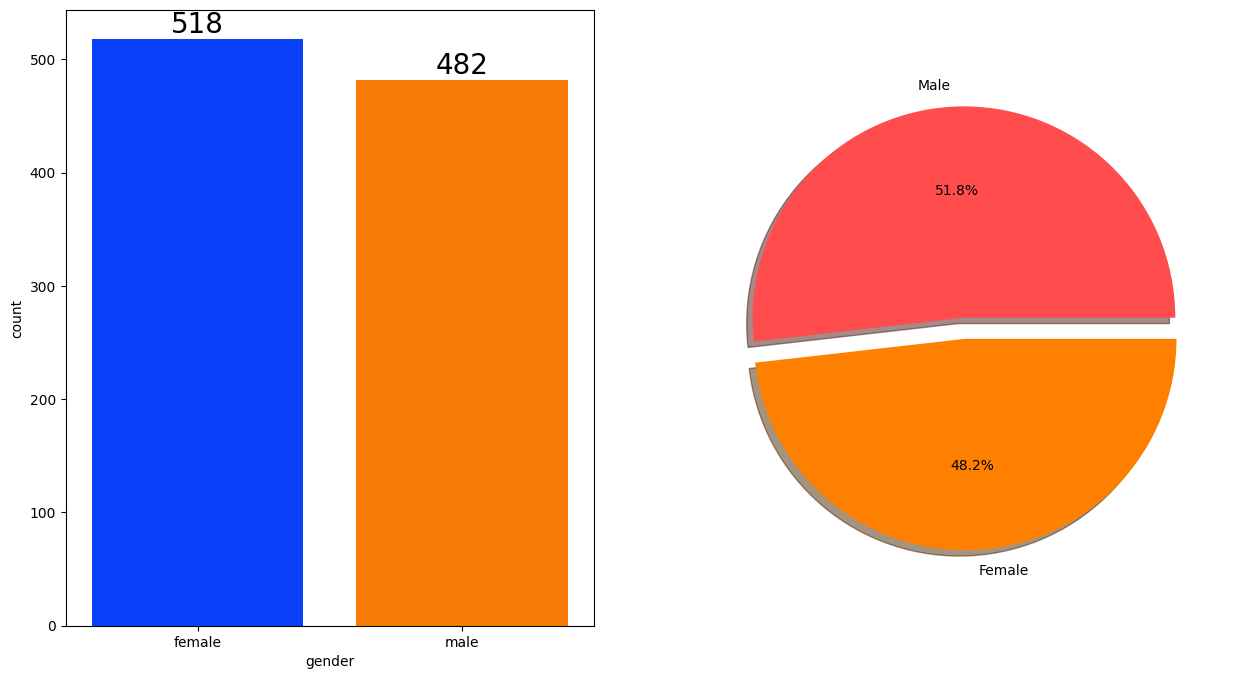

In [164]:

fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [169]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


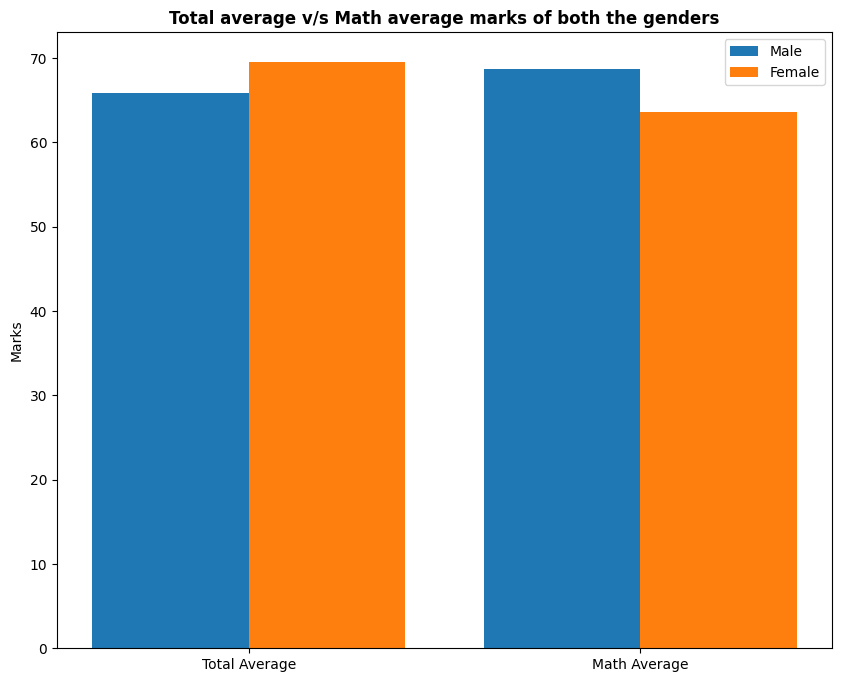

In [171]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
1) On an average females have a better overall score than men.
2) whereas males have scored higher in Maths.
### 4.4.2 RACE/EHNICITY COLUMN
1) How is Group wise distribution ?
2) Is Race/Ehnicity has any impact on student's performance ?
3) UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

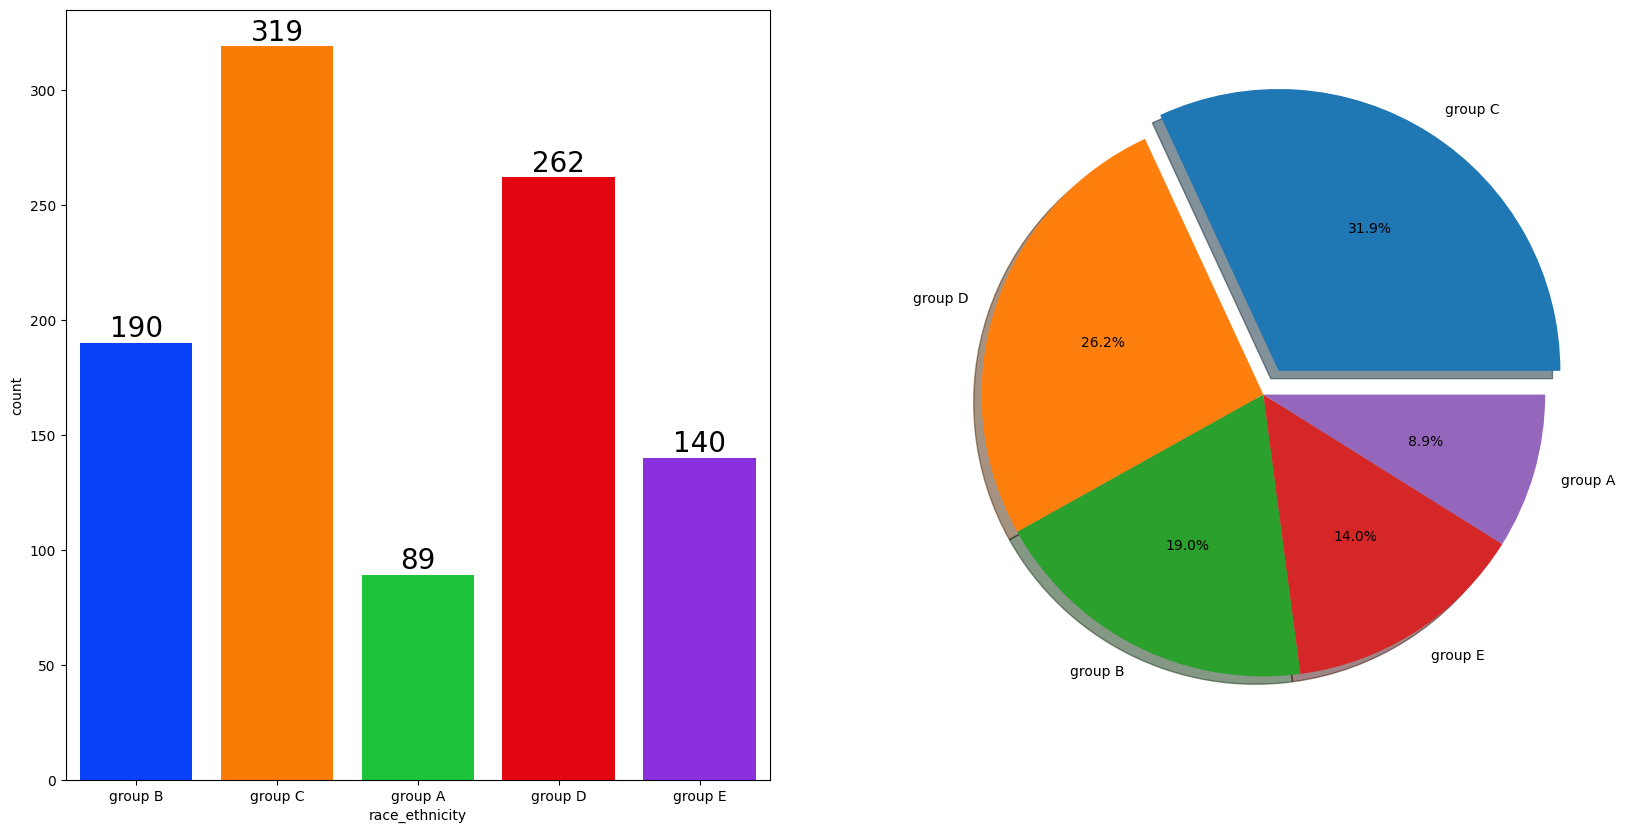

In [172]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

### Insights
1) Most of the student belonging from group C /group D.
2) Lowest number of students belong to group A.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

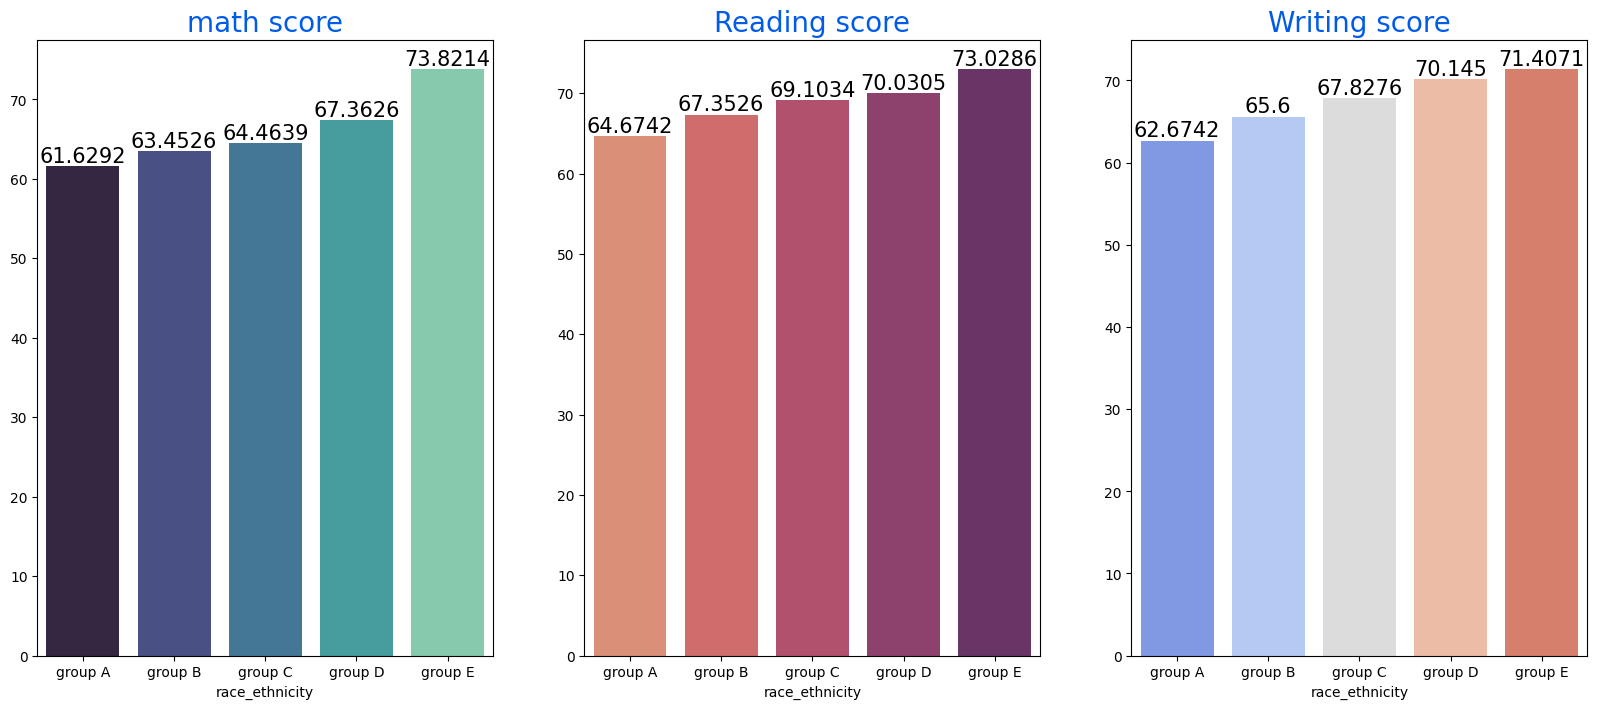

In [173]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
1) Group E students have scored the highest marks.
2) Group A students have scored the lowest marks.
3) Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
1) What is educational background of student's parent ?
2) Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

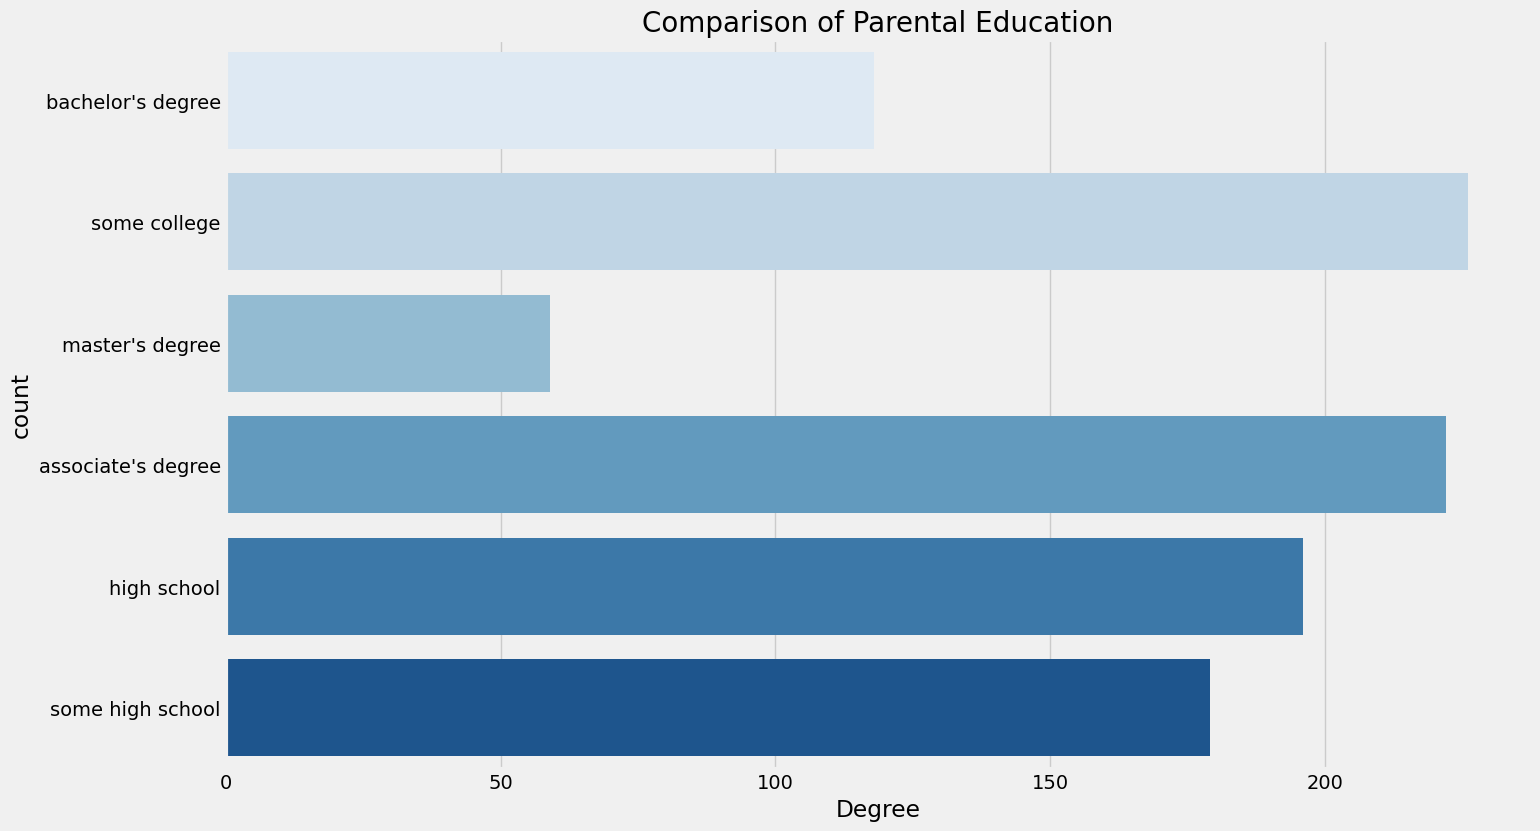

In [174]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
1) Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

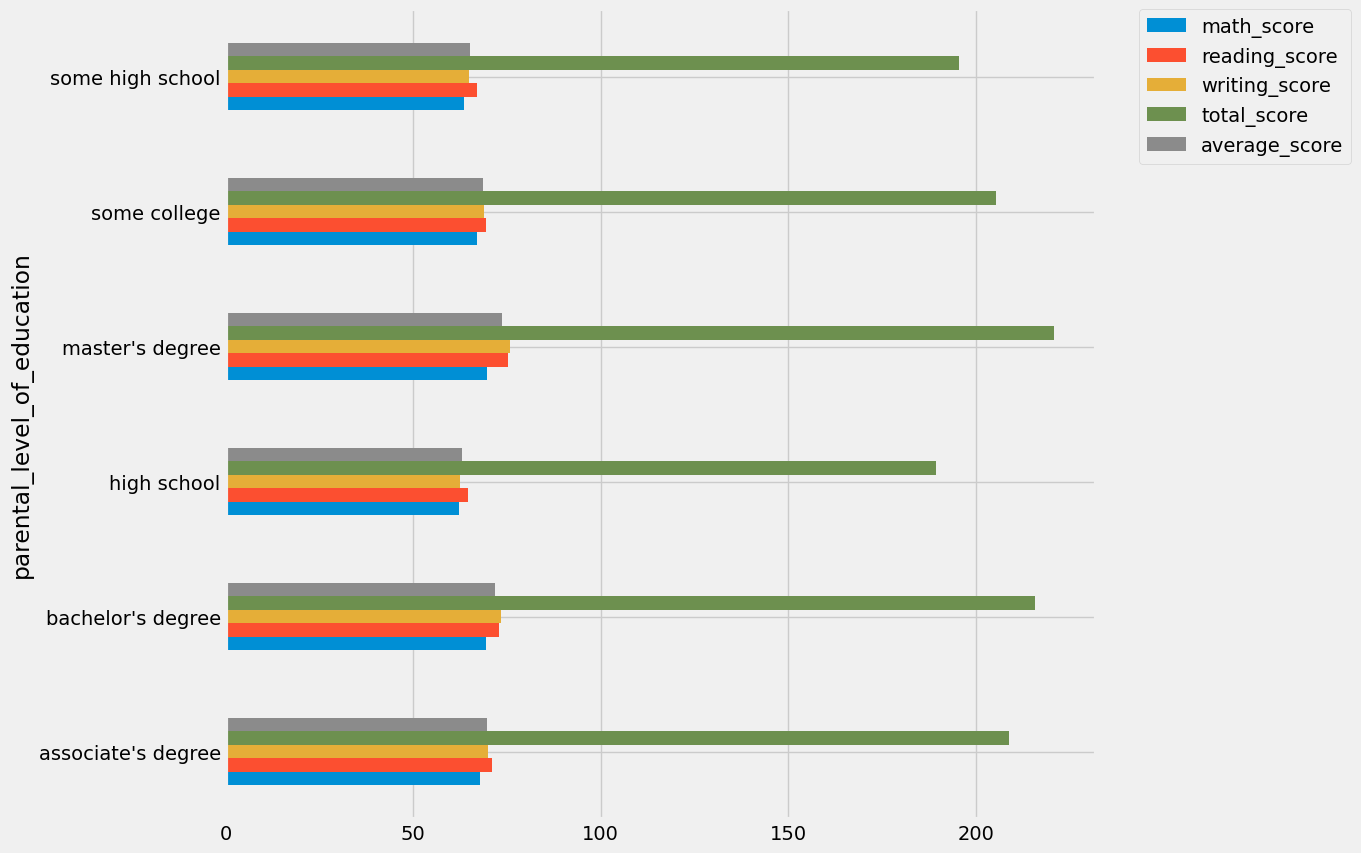

In [176]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights
1) Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
### 4.4.5 TEST PREPARATION COURSE COLUMN
1) Which type of lunch is most common amoung students ?
2) Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

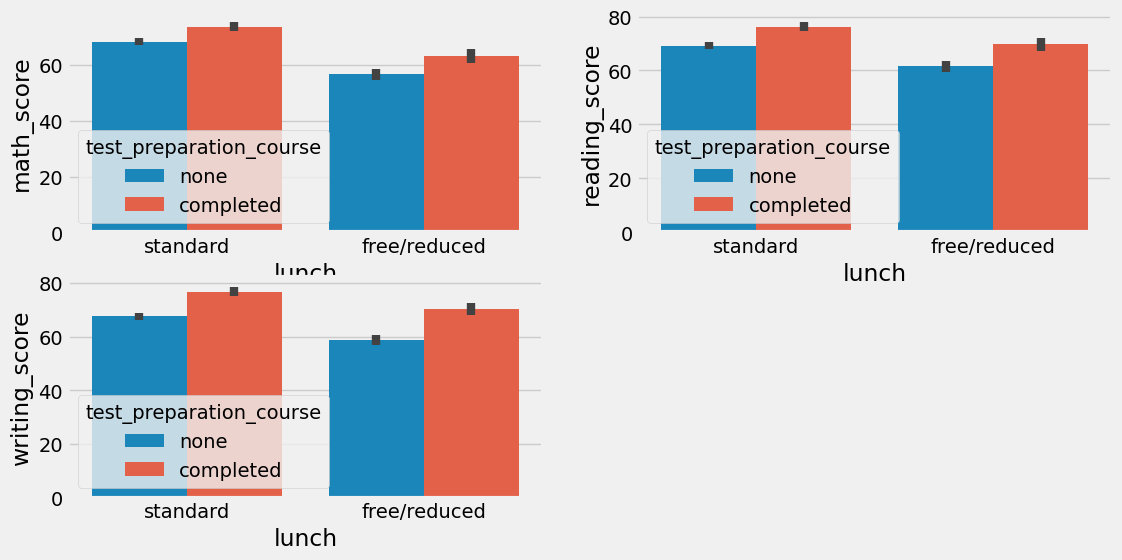

In [182]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

### Insights
1) Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
### 4.4.6 CHECKING OUTLIERS

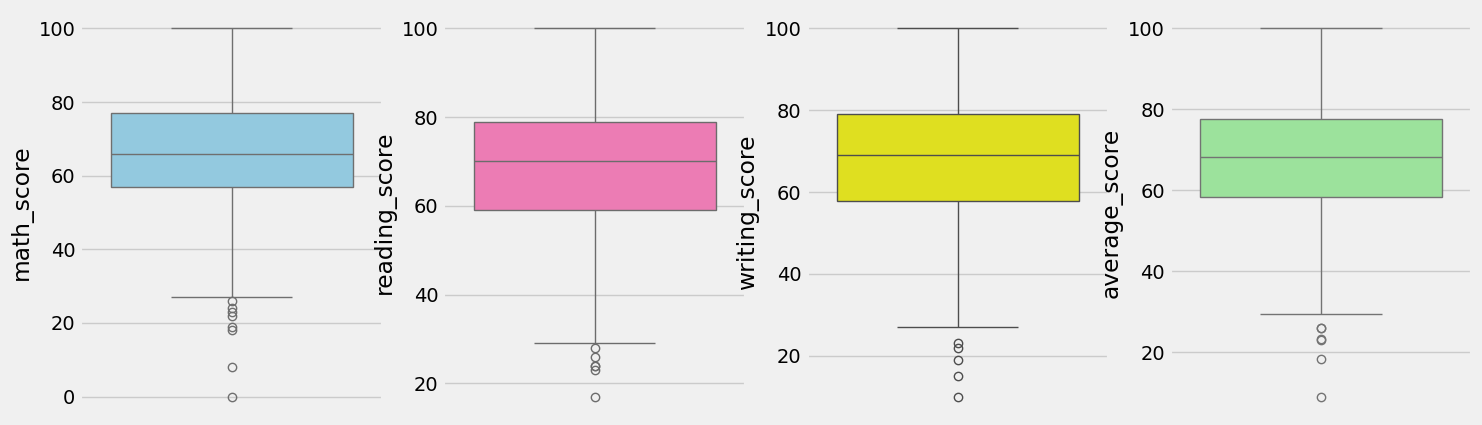

In [179]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

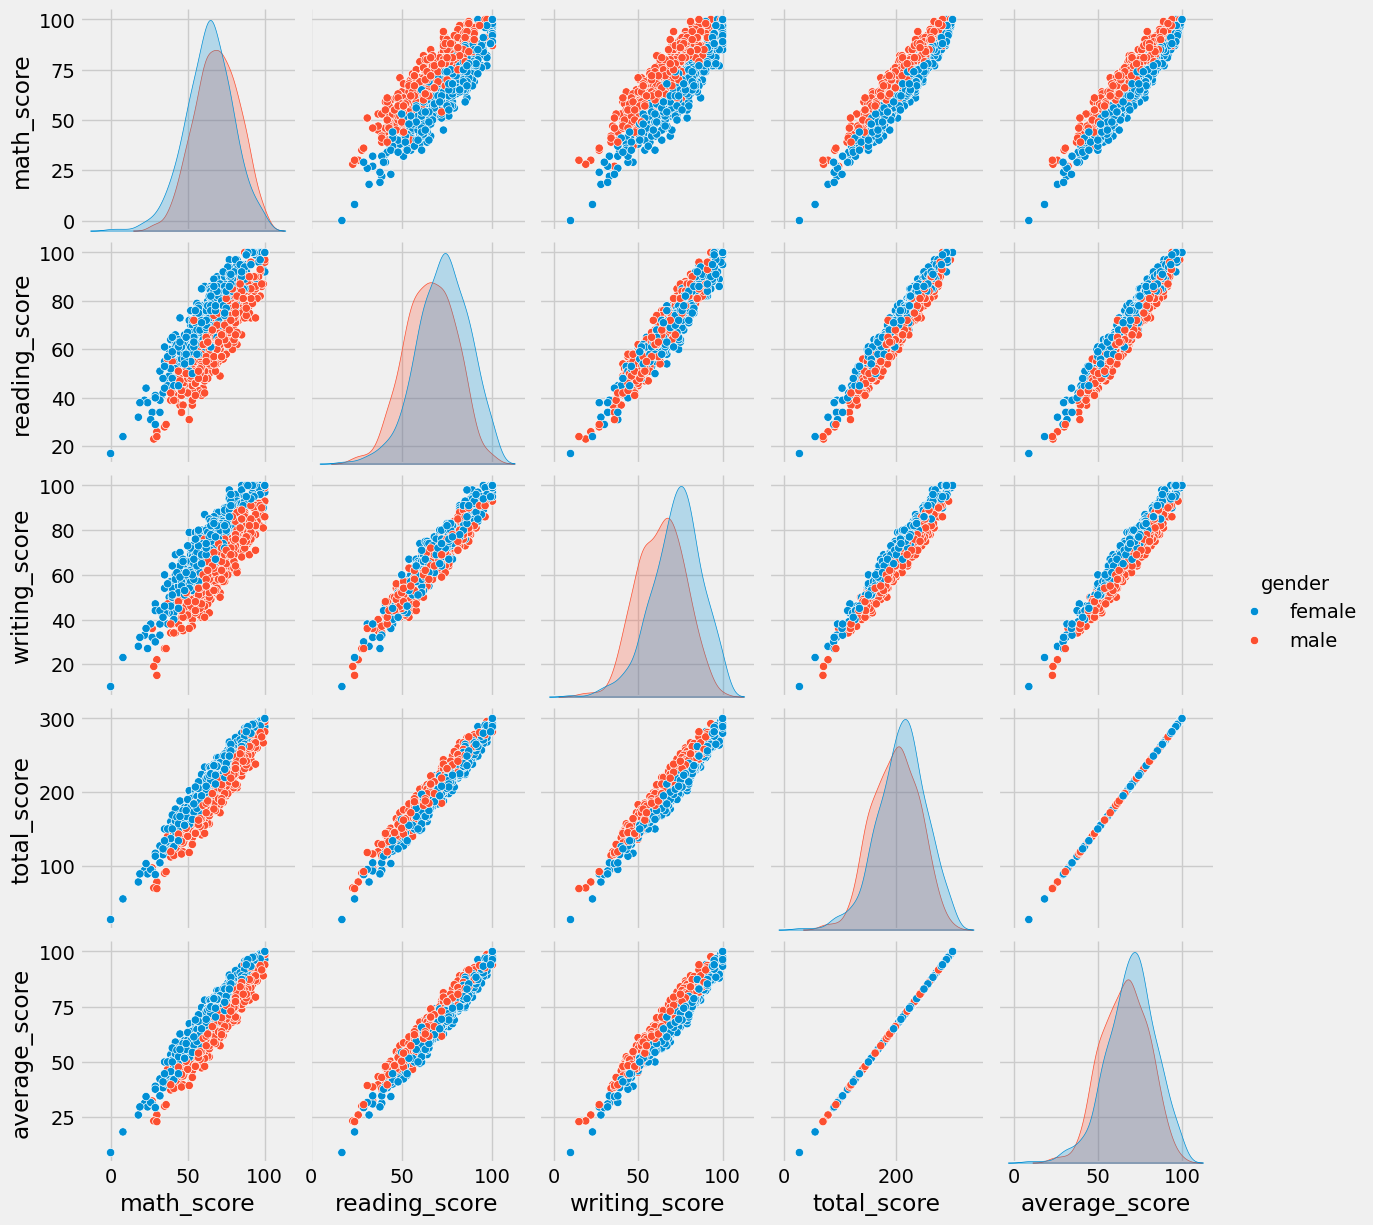

In [181]:
sns.pairplot(df,hue ='gender')
plt.show()

### Insights
1) From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
1) Student's Performance is related with lunch, race, parental level education
2) Females lead in pass percentage and also are top-scorers
3) Student's Performance is not much related with test preparation course
4) Finishing preparation course is benefitial.